# 🔥 CALORIE BURN PREDICTION MODEL

**Predict calories burned using workout time, weight, workout type**

In [ ]:
# Install required libraries
!pip install pandas numpy scikit-learn

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

**Step 1: Create a Sample Dataset**

In [ ]:
data = {
    "weight_kg": [55, 60, 65, 70, 75, 80, 85, 90, 68, 72],
    "workout_time_min": [20, 30, 45, 60, 25, 35, 50, 55, 40, 30],
    "workout_type": ["Cardio", "Strength", "Cardio", "Cardio", "Strength",
                     "Yoga", "Cardio", "Strength", "Yoga", "Cardio"],
    "calories_burned": [180, 220, 320, 420, 210, 150, 350, 300, 160, 250]
}

df = pd.DataFrame(data)

df.head()

,weight_kg,workout_time_min,workout_type,calories_burned
0,55,20,Cardio,180
1,60,30,Strength,220
2,65,45,Cardio,320
3,70,60,Cardio,420
4,75,25,Strength,210


**Preprocessing Model Building**

**Step 2: Split the data**

In [ ]:
X = df[["weight_kg", "workout_time_min", "workout_type"]]
y = df["calories_burned"]

**Step 3: Handle categorical data**

In [ ]:
categorical_features = ["workout_type"]
numeric_features = ["weight_kg", "workout_time_min"]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(), categorical_features)
], remainder="passthrough")

**Step 4: Create the model pipeline**

In [ ]:
model = Pipeline([
    ("preprocess", preprocessor),
    ("regressor", LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['workout_type'])])),
                ('regressor', LinearRegression())])

**Step 5: Model Evaluation**

In [ ]:
y_pred = model.predict(X_test)

print("🔥 Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("📊 R2 Score:", r2_score(y_test, y_pred))

🔥 Mean Absolute Error: 13.901473711307048
📊 R2 Score: 0.7666281675504223


**Predict Calories for New Input**

**Step 6: Predict New Data**

In [ ]:
new_data = pd.DataFrame({
    "weight_kg": [70],
    "workout_time_min": [40],
    "workout_type": ["Cardio"]
})

prediction = model.predict(new_data)

print("🔥 Predicted Calories Burned:", prediction[0])

🔥 Predicted Calories Burned: 298.8335800244546


**Data Visualization**

In [ ]:
import matplotlib.pyplot as plt

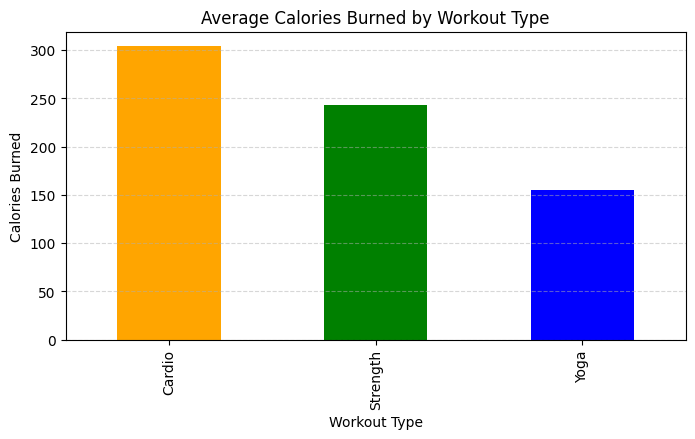

In [ ]:
plt.figure(figsize=(8,4))
df.groupby("workout_type")["calories_burned"].mean().plot(kind="bar", color=["orange","green","blue"])
plt.title("Average Calories Burned by Workout Type")
plt.ylabel("Calories Burned")
plt.xlabel("Workout Type")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

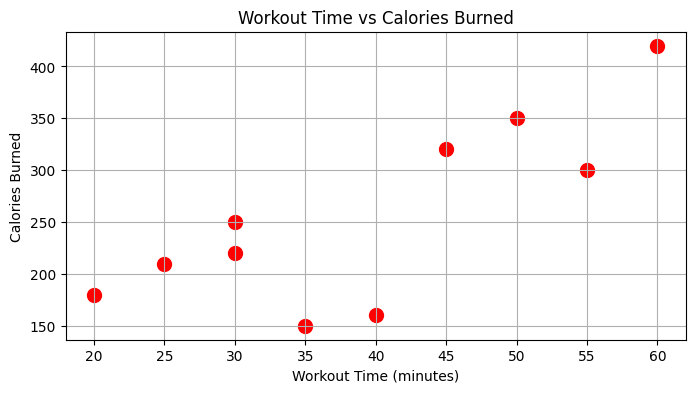

In [ ]:
# 2. Scatter Plot — Workout Time vs Calories

plt.figure(figsize=(8,4))
plt.scatter(df["workout_time_min"], df["calories_burned"], s=100, c="red")
plt.title("Workout Time vs Calories Burned")
plt.xlabel("Workout Time (minutes)")
plt.ylabel("Calories Burned")
plt.grid(True)
plt.show()